# Precision recall e ROC

### ROC
TruePositiveRate = TruePositives / (TruePositives + False Negatives)   (RECALL)

FalsePositiveRate = FalsePositives / (FalsePositives + TrueNegatives)

<img src="ROC-Curve.jpg" width=600 height=600 />

### Precision Recall
Precision = TruePositives / (TruePositives + FalsePositives)

Recall = TruePositives / (TruePositives + FalseNegatives)

<img src="Precision-Recall-Curve.jpg" width=600 height=600 />

<img src="Precisionrecall.svg" width=300 height=300 />

https://sinyi-chou.github.io/classification-pr-curve/
#

When data is imbalanced, the AUC might not reflect the true performance of the classifier. The definition of the False Positive Rate (FPR), is the number of false positives divided by the number of negative samples. FPR is considered better when it’s smaller since it indicates fewer false positives. In imbalanced data, the FPR tends to stay at small values due to the large numbers of negatives (i.e. making the denominator large). Thus, FPR becomes less informative for the model performance in this situation.  - 
#### La FPR rimane piccola a causa dello sbilanciamento, non a causa della bont del modello

# Instrinsic Dimension

In [1]:
import skdim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generate data : np.array (n_points x n_dim). Here a uniformly sampled 5-ball embedded in 10 dimensions
dims = (1000,10)
data = np.zeros(dims)
data2 = np.ones(dims)
data_ball = data.copy()
data_ball[:,:5] = skdim.datasets.hyperBall(n = 1000, d = 5, radius = 1, random_state = 0)
data_ball2 = data2.copy()
data_ball2[:,:5] = skdim.datasets.hyperBall(n = 1000, d = 5, radius = 1, random_state = 0)

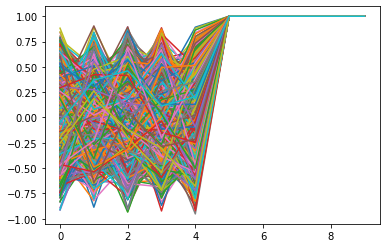

In [3]:
plt.plot(data_ball2.T);

In [7]:
#estimate global intrinsic dimension
danco = skdim.id.DANCo().fit(data_ball)
metodo = skdim.id.TwoNN()
#estimate local intrinsic dimension (dimension in k-nearest-neighborhoods around each point):
lpca = skdim.id.lPCA().fit_pw(data_ball, n_neighbors = 100, n_jobs = 1)

#get estimated intrinsic dimension
print(round(danco.dimension_,2), round(np.mean(lpca.dimension_pw_),2))

4.96 5.0


In [4]:
metodo.fit(data_ball).dimension_, metodo.fit(data_ball2).dimension_

(4.626589720639767, 4.626589720639767)

In [8]:
def calc(d=1000):
    dims = (d,32)
    data3 = np.ones(dims)
    data_ball3 = data3.copy()
    data_ball3[:,:2] = skdim.datasets.hyperBall(n = d, d = 2, radius = 1, random_state = 0)
    res = metodo.fit(data_ball)
    print(res.dimension_)

In [24]:
calc(12)

4.626589720639767


In [4]:
emb_array = np.load("emb_array.npy")

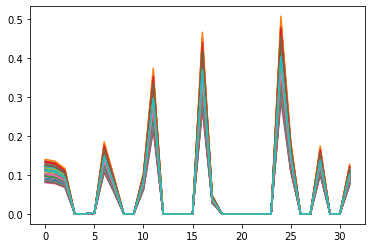

In [5]:
plt.plot(emb_array.T);

In [9]:
metodo.fit(emb_array)

mu: [1.00000000e+00 1.00000000e+00 1.00000262e+00 1.00000274e+00
 1.00000453e+00 1.00000846e+00 1.00000989e+00 1.00001562e+00
 1.00001884e+00 1.00001919e+00 1.00003421e+00 1.00191963e+00
 1.00615692e+00 1.00630927e+00 1.01112437e+00 1.03391445e+00
 1.04813123e+00 1.06887054e+00 1.09287345e+00 1.11436796e+00
 1.11776614e+00 1.12878001e+00 1.14790356e+00 1.15946531e+00
 1.17100346e+00 1.20315349e+00 1.24335921e+00 1.33967757e+00
 1.43432784e+00 1.43804467e+00 1.44501364e+00 1.53439975e+00
 1.55812871e+00 1.56353521e+00 1.64852667e+00 1.70138049e+00
 1.73647940e+00 1.73962903e+00 1.76634610e+00 1.81577623e+00
 1.87152660e+00 1.89030290e+00 1.97527456e+00 1.97922683e+00
 2.02961326e+00 2.10485888e+00 2.15153790e+00 2.28163695e+00
 2.35780931e+00 2.40396786e+00 2.40451241e+00 2.43292117e+00
 2.44666123e+00 2.53863597e+00 2.76100302e+00 3.97492146e+00
 4.00000000e+00 1.20981321e+01 1.28391676e+01 2.95672340e+01
 3.00968800e+01 1.32431543e+04 1.32433623e+04 1.33865459e+04
 1.33870049e+04 2.29

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Ho dovuto aggungere questa riga nel file _TwoNN.py per gestire questo problema che capita non so perchee con alcuni embeddings

mu = np.nan_to_num(mu, nan=0.000000001, posinf=9999999999, neginf=9999999999)
